In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# input Ex (from Br0 to Br12)
Ex = [-3666.65366132,
     -3.6754420815E+03,
     -3.6839027452E+03,
     -3.6931964747E+03,
     -3.7018743503E+03,
     -3.7108255544E+03,
     -3.7198376263E+03,
     -3.7291860202E+03,
     -3.7380176509E+03,
     -3.7476733273E+03,
     -3.7569261148E+03,
     -3.7659887746E+03,
     -3776.00723982
     ]

# create dataframe
df = pd.DataFrame({"x":np.linspace(0,1,13),"Ex": Ex})

# Ex per atom
df.Ex = df.Ex / 768

# set EBr and EI
EBr = df.Ex.iloc[-1]
EI = df.Ex.iloc[0]

Text(0, 0.5, 'Free energy (eV/atom)')

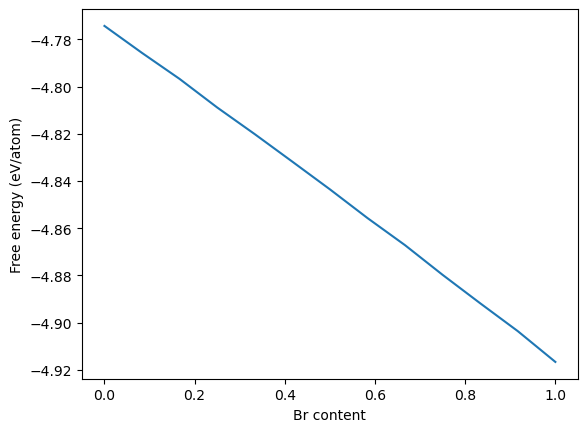

In [2]:
# show free energy per atom of mixing perovskite
plt.plot(df.x,df.Ex)
plt.xlabel('Br content')
plt.ylabel('Free energy (eV/atom)')

In [3]:
# calculate dH
df["dH"] = df.Ex - df.x * EBr - (1 - df.x) * EI

# turn eV into meV
df.dH = 1000*df.dH

In [4]:
# fitting dH points
def constrain(x,a):
    return -a*x**2+a*x

popt, pcov = curve_fit(constrain, df.x, df.dH)
y_fit = constrain(np.linspace(0,1,100), *popt)

Text(0, 0.5, 'Formation Enthalpy (meV/atom)')

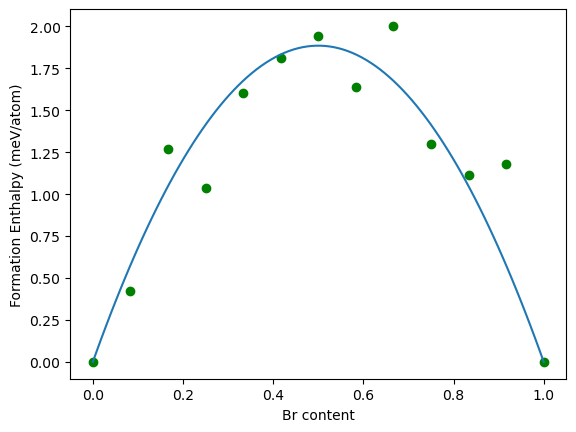

In [5]:
# draw formation enthalpy per atom
plt.scatter(df.x,df.dH, marker='o', color = "green")
plt.plot(np.linspace(0,1,100),y_fit)
plt.xlabel('Br content')
plt.ylabel('Formation Enthalpy (meV/atom)')